In [93]:
import numpy as np
import pickle
import json
import os
import sys
import copy
import sklearn.preprocessing
import models
from sklearn.neighbors import NearestNeighbors
import utils

In [2]:
DATA_DIR = "../../data/fb15k/"
DUMP_FILE = "../dumps/fb15k_distmult_dump_norm.pkl"
MODEL_TYPE = "distmult"
mining_dir="mined"

In [3]:
train_data = utils.read_data(os.path.join(DATA_DIR,"train.txt"))
# dev_data = read_data(os.path.join(DATA_DIR,"valid.txt"))
# test_data = read_data(os.path.join(DATA_DIR,"test.txt"))

In [4]:
dump=utils.load_pickle(DUMP_FILE)
dump.keys()

dict_keys(['tail_rel_type', 'entity_type', 'entity_to_id', 'head_rel_type', 'entity_real', 'rel_real', 'relation_to_id'])

In [5]:
model=models.TypedDM(DUMP_FILE)

In [6]:
mapped_train_data = utils.map_data(train_data,dump)
# mapped_dev_data = map_data(dev_data)
# mapped_test_data = map_data(test_data)

In [94]:
head_index=utils.get_head_index(mapped_train_data)
head_relation=utils.get_ent_to_relset(mapped_train_data)
head_ent=utils.get_ent_to_entset(mapped_train_data)
print(len(head_index))
print(len(head_relation))
print(len(head_ent))

14834


In [95]:
entity_count=len(dump['entity_to_id'])
print(entity_count)

14952


In [62]:
flatten=np.reshape(model.entity_similarity,(-1,1))

In [63]:
print(flatten.shape)
print(flatten[-10:])

(223562304, 1)
[[-0.15906487]
 [-0.12675086]
 [-0.13984215]
 [-0.04599508]
 [ 0.96332979]
 [-0.00330707]
 [-0.32200447]
 [-0.28931797]
 [-0.13849103]
 [ 0.99999994]]


In [64]:
temp=np.arange(entity_count*entity_count)
temp=temp.reshape(-1,1)
print(temp.shape)

(223562304, 1)


In [86]:
new_val=np.concatenate((flatten,temp),axis=1)
new_val_pruned=new_val[new_val[:,0]>0.95]

In [87]:
print(new_val_pruned.shape)

(41640, 2)


In [88]:
new_val_pruned=np.sort(new_val_pruned)

In [89]:
def return_iou(new_val_pruned,head_index):
    length=new_val_pruned.shape[0]
    arr=[]
    for i in range(length-1,-1,-1):
        e1=int(new_val_pruned[i][1])//entity_count
        e2=int(new_val_pruned[i][1])%entity_count
        if e1 not in head_index:
            continue
        if e2 not in head_index:
            continue
        set_e1=set(head_index[e1])
        set_e2=set(head_index[e2])
        inters=len(set_e1&set_e2)
        union=len(set_e1|set_e2)
        iou=inters*1.0/union
        arr.append([iou,new_val_pruned[i][0]])
    return np.array(arr)

(41258, 2)


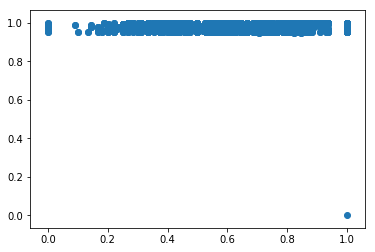

In [90]:
import matplotlib.pyplot as plt
array=return_iou(new_val_pruned,head_index)
print(array.shape)
plt.scatter(array[:,0], array[:,1])
plt.show()

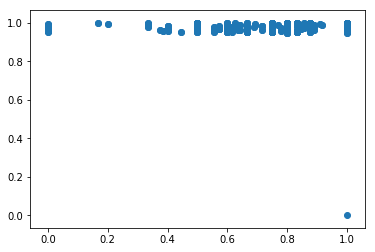

In [91]:
array=return_iou(new_val_pruned,head_relation)
plt.scatter(array[:,0], array[:,1])
plt.show()

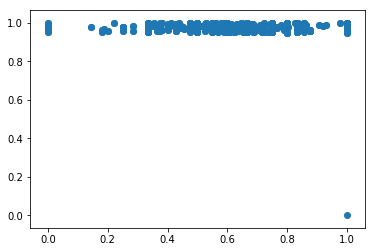

In [92]:
9array=return_iou(new_val_pruned,head_ent)
plt.scatter(array[:,0], array[:,1])
plt.show()